# 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Codecademy Go** di Google Play Store. 

## 🔧 **Libraries Used**

In [129]:
from google_play_scraper import reviews, Sort, app

# Data & Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP dan Preprocessing
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import contractions
import re
import unicodedata
import spacy

# Model dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# WordCloud
from wordcloud import WordCloud

# Utility
from collections import Counter

## 🏁 **Tahapan Proyek**  

### 1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [130]:
info = app('com.ryzac.codecademygo')  # ID aplikasi Human Resource Machine
print("Versi terbaru:", info['version'])

Versi terbaru: 1.15.0


versi terbaru hanya 170 baris, jadi diambil berdasarkan 2 versi terakhir

In [131]:
# Ambil 1000 review terbaru
result, _ = reviews(
    'com.ryzac.codecademygo',
    lang='en',
    count=1000,
    sort=Sort.NEWEST
)

# Simpan ke dalam variabel filtered_reviews agar tetap kompatibel
filtered_reviews = result

In [132]:
# Simpan hasil filter ke dalam DataFrame
df = pd.DataFrame(filtered_reviews)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7f2aed35-fde1-4c89-baf9-ca6c2e577380,Rapper Fakundo,https://play-lh.googleusercontent.com/a-/ALV-U...,it is good apk for studying,5,0,1.15.0,2025-06-14 16:39:19,None,NaT,1.15.0
1,4afed7ca-2fa3-40c6-9299-5a8eb800e089,Tejas Bhatt,https://play-lh.googleusercontent.com/a-/ALV-U...,nice,4,0,None,2025-06-14 09:46:23,None,NaT,None
2,752e1873-df81-4a5e-8f78-a79405fd00ec,Uchechukwu Nkenta,https://play-lh.googleusercontent.com/a-/ALV-U...,Awesome 👌,5,0,1.15.0,2025-06-13 11:16:26,None,NaT,1.15.0
3,662434ed-20cd-4334-ba10-b6d96c41a01a,Ofc. S.T. Smith- Jones,https://play-lh.googleusercontent.com/a-/ALV-U...,I love the Code Academy ease of use.,4,0,1.15.0,2025-06-09 13:18:52,None,NaT,1.15.0
4,fb0215b0-71ff-4f0c-b814-32983647d2db,Sir Thomas (Tom),https://play-lh.googleusercontent.com/a-/ALV-U...,Great way to keep your coding skills fresh in ...,5,0,1.15.0,2025-06-09 06:56:49,None,NaT,1.15.0
...,...,...,...,...,...,...,...,...,...,...,...
995,741f3262-6c21-4912-915d-ff91b1cf47ed,Malan Bandara,https://play-lh.googleusercontent.com/a-/ALV-U...,"it's okay, but not great because the learning ...",4,0,1.14.0,2022-10-05 12:35:59,None,NaT,1.14.0
996,58e45100-923e-4bcb-9c70-5a5790153f1a,OP SAI _YT,https://play-lh.googleusercontent.com/a-/ALV-U...,good for learning data science,5,0,1.14.0,2022-10-05 12:35:14,None,NaT,1.14.0
997,dbb63c87-283d-4bee-9de4-39f0191516ae,Taqi Khaliqdad,https://play-lh.googleusercontent.com/a-/ALV-U...,Game changer!,5,0,None,2022-10-05 05:11:05,None,NaT,None
998,4b551cf5-2a0e-404a-babc-b0bef8ed5601,Aliyu Muktar,https://play-lh.googleusercontent.com/a-/ALV-U...,This app really looks cool and it's working well,4,0,1.14.0,2022-10-05 03:16:36,None,NaT,1.14.0


In [133]:
output_path = "../data/review_codecademygo.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_codecademygo.xlsx


In [134]:
# # Import data
# file_path = "../data/review_codecademygo.xlsx"
# df = pd.read_excel(file_path)
# df.head()

In [135]:
df2 = df[['content', 'score']].copy()
df2

,content,score
0,it is good apk for studying,5
1,nice,4
2,Awesome 👌,5
3,I love the Code Academy ease of use.,4
4,Great way to keep your coding skills fresh in ...,5
...,...,...
995,"it's okay, but not great because the learning ...",4
996,good for learning data science,5
997,Game changer!,5
998,This app really looks cool and it's working well,4


### 2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [136]:
# Melihat jumlah rating ulasan App
df2['score'].value_counts()

score
5    621
4    143
1    111
3     78
2     47
Name: count, dtype: int64

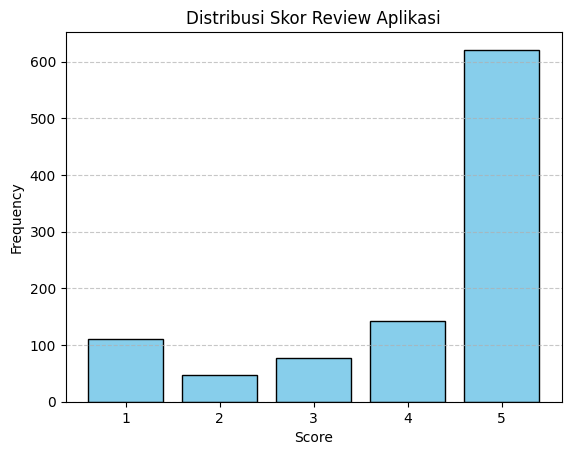

In [137]:
# Histogram skor 1–5
plt.hist(df2['score'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])  # Skor tetap integer
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review Aplikasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [138]:
# Rangkuman statistik
df2.describe().loc[:, ['score']]

,score
count,1000.000000
mean,4.116000
std,1.369094
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='at'>

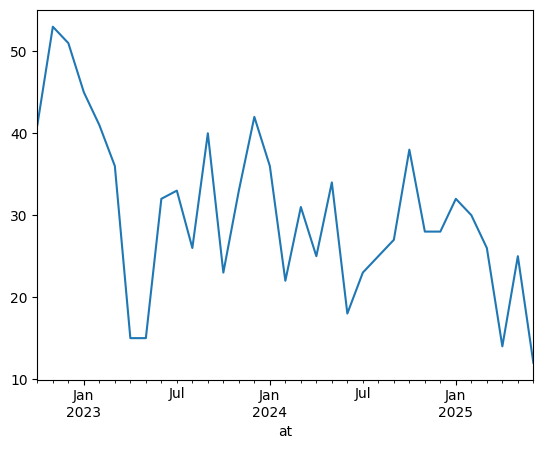

In [139]:
# Grafik jumlah review per bulan.
df['at'] = pd.to_datetime(df['at'])  # Pastikan format datetime
df.set_index('at').resample('ME').count()['reviewId'].plot()


### 3️⃣ **Tahapan Preprocessing**

In [140]:
# ✅ 1. Handling Missing Values → Menghapus atau mengisi data yang kosong  
print(df2.isnull().sum())

content    0
score      0
dtype: int64


In [141]:
# ✅ 2. Lowercasing → Mengubah seluruh teks menjadi huruf kecil  
df2['content_clean'] = df2['content'].astype(str).str.lower()
df2.head(5)

,content,score,content_clean
0,it is good apk for studying,5,it is good apk for studying
1,nice,4,nice
2,Awesome 👌,5,awesome 👌
3,I love the Code Academy ease of use.,4,i love the code academy ease of use.
4,Great way to keep your coding skills fresh in ...,5,great way to keep your coding skills fresh in ...


In [142]:
# ✅ 3. Expand Contraction → Mengubah bentuk singkatan menjadi bentuk lengkap (e.g., don't → do not)  
df2['content_clean'] = df2['content_clean'].apply(lambda x: contractions.fix(x))
df2.head(5)

,content,score,content_clean
0,it is good apk for studying,5,it is good apk for studying
1,nice,4,nice
2,Awesome 👌,5,awesome 👌
3,I love the Code Academy ease of use.,4,i love the code academy ease of use.
4,Great way to keep your coding skills fresh in ...,5,great way to keep your coding skills fresh in ...


In [143]:
# ✅ 4. Tokenisasi → Memisahkan teks menjadi daftar kata

# Inisialisasi tokenizer Treebank
tokenizer = TreebankWordTokenizer()

# Terapkan tokenisasi
df2['tokens'] = df2['content_clean'].apply(lambda x: tokenizer.tokenize(x))
df2.head(5)


,content,score,content_clean,tokens
0,it is good apk for studying,5,it is good apk for studying,"[it, is, good, apk, for, studying]"
1,nice,4,nice,[nice]
2,Awesome 👌,5,awesome 👌,"[awesome, 👌]"
3,I love the Code Academy ease of use.,4,i love the code academy ease of use.,"[i, love, the, code, academy, ease, of, use, .]"
4,Great way to keep your coding skills fresh in ...,5,great way to keep your coding skills fresh in ...,"[great, way, to, keep, your, coding, skills, f..."


In [144]:
# ✅ 5. Cabang token untuk VADER 
df2['tokens_vader'] = df2['tokens']

In [145]:
# Stopwords bawaan + custom domain-specific
stop_words = set(stopwords.words('english'))

# Tambahkan custom stopwords domain Play Store
custom_words = {
    'app', 'apps', 'application', 'play', 'store', 'installed', 'install',
    'downloading', 'download', 'device', 'phone', 'mobile', 'using', 'used',
    'google', 'work', 'mimo', 'hub', 'sphero', 'edu','sololearn','codecademy','go','working'  # opsional tergantung fokus topik
}
stop_words.update(custom_words)

# Terapkan stopword removal ke token yang sudah bebas tanda baca
df2['tokens_clean'] = df2['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])


In [146]:
def normalize_token(token):
    # Hapus spasi, simbol, dan karakter unicode aneh
    token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
    return token.strip()  # Hapus spasi atau newline

def is_alpha(token):
    return token.isalpha()

df2['tokens_clean'] = df2['tokens_clean'].apply(lambda tokens: [
    normalize_token(t).lower()
    for t in tokens
    if is_alpha(normalize_token(t).strip())
])

df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean
0,it is good apk for studying,5,it is good apk for studying,"[it, is, good, apk, for, studying]","[it, is, good, apk, for, studying]","[good, apk, studying]"
1,nice,4,nice,[nice],[nice],[nice]
2,Awesome 👌,5,awesome 👌,"[awesome, 👌]","[awesome, 👌]",[awesome]
3,I love the Code Academy ease of use.,4,i love the code academy ease of use.,"[i, love, the, code, academy, ease, of, use, .]","[i, love, the, code, academy, ease, of, use, .]","[love, code, academy, ease, use]"
4,Great way to keep your coding skills fresh in ...,5,great way to keep your coding skills fresh in ...,"[great, way, to, keep, your, coding, skills, f...","[great, way, to, keep, your, coding, skills, f...","[great, way, keep, coding, skills, fresh, mind..."


In [147]:
# Cek baris mana saja yang mengandung token 'nice' sebelum dibersihkan
df2[df2['tokens'].apply(lambda tokens: 'nice' in tokens)]


,content,score,content_clean,tokens,tokens_vader,tokens_clean
1,nice,4,nice,[nice],[nice],[nice]
13,nice,4,nice,[nice],[nice],[nice]
49,very nice app,5,very nice app,"[very, nice, app]","[very, nice, app]",[nice]
65,Nice for C languages.,5,nice for c languages.,"[nice, for, c, languages, .]","[nice, for, c, languages, .]","[nice, c, languages]"
128,A nice review to keep me on my toes,4,a nice review to keep me on my toes,"[a, nice, review, to, keep, me, on, my, toes]","[a, nice, review, to, keep, me, on, my, toes]","[nice, review, keep, toes]"
131,nice,5,nice,[nice],[nice],[nice]
142,"very nice, how much",5,"very nice, how much","[very, nice, ,, how, much]","[very, nice, ,, how, much]","[nice, much]"
161,Nice to have when I'm not near my computer but...,3,nice to have when i am not near my computer bu...,"[nice, to, have, when, i, am, not, near, my, c...","[nice, to, have, when, i, am, not, near, my, c...","[nice, near, computer, flash, cards, help, adv..."
169,I thought I'd be able to do the course on here...,3,i thought i would be able to do the course on ...,"[i, thought, i, would, be, able, to, do, the, ...","[i, thought, i, would, be, able, to, do, the, ...","[thought, would, able, course, well, practice,..."
187,what a nice place to learn computer science an...,5,what a nice place to learn computer science an...,"[what, a, nice, place, to, learn, computer, sc...","[what, a, nice, place, to, learn, computer, sc...","[nice, place, learn, computer, science, coding]"


In [148]:
#✅ 8. Lemmatization
# Load model spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi lemmatizer menggunakan spaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Gabungkan token ke dalam satu string untuk diproses
    return [token.lemma_ for token in doc]

# Lemmatisasi kolom 'tokens_vader'
df2['tokens_vader_lemma'] = df2['tokens_vader'].apply(lemmatize_tokens)

# Lemmatisasi kolom 'tokens_clean'
df2['tokens_clean_lemma'] = df2['tokens_clean'].apply(lemmatize_tokens)
df2.head(5)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_vader_lemma,tokens_clean_lemma
0,it is good apk for studying,5,it is good apk for studying,"[it, is, good, apk, for, studying]","[it, is, good, apk, for, studying]","[good, apk, studying]","[it, be, good, apk, for, study]","[good, apk, study]"
1,nice,4,nice,[nice],[nice],[nice],[nice],[nice]
2,Awesome 👌,5,awesome 👌,"[awesome, 👌]","[awesome, 👌]",[awesome],"[awesome, 👌]",[awesome]
3,I love the Code Academy ease of use.,4,i love the code academy ease of use.,"[i, love, the, code, academy, ease, of, use, .]","[i, love, the, code, academy, ease, of, use, .]","[love, code, academy, ease, use]","[I, love, the, code, academy, ease, of, use, .]","[love, code, academy, ease, use]"
4,Great way to keep your coding skills fresh in ...,5,great way to keep your coding skills fresh in ...,"[great, way, to, keep, your, coding, skills, f...","[great, way, to, keep, your, coding, skills, f...","[great, way, keep, coding, skills, fresh, mind...","[great, way, to, keep, your, coding, skill, fr...","[great, way, keep, code, skill, fresh, mind, c..."


In [149]:
#✅ 9. Removing Rare Words (frekuensi < 3)

# Gabungkan semua token dari seluruh review menjadi satu list
all_clean_lemmas = [token for tokens in df2['tokens_clean_lemma'] for token in tokens]

# Hitung frekuensi kata
token_freq = Counter(all_clean_lemmas)

# Ambil kata-kata yang muncul ≥ 3 kali
min_freq = 3
valid_tokens = set([token for token, freq in token_freq.items() if freq >= min_freq])

# Hapus token yang tidak termasuk dalam set valid_tokens
df2['tokens_clean_final'] = df2['tokens_clean_lemma'].apply(lambda tokens: [t for t in tokens if t in valid_tokens])
df2.head()


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_vader_lemma,tokens_clean_lemma,tokens_clean_final
0,it is good apk for studying,5,it is good apk for studying,"[it, is, good, apk, for, studying]","[it, is, good, apk, for, studying]","[good, apk, studying]","[it, be, good, apk, for, study]","[good, apk, study]","[good, study]"
1,nice,4,nice,[nice],[nice],[nice],[nice],[nice],[nice]
2,Awesome 👌,5,awesome 👌,"[awesome, 👌]","[awesome, 👌]",[awesome],"[awesome, 👌]",[awesome],[awesome]
3,I love the Code Academy ease of use.,4,i love the code academy ease of use.,"[i, love, the, code, academy, ease, of, use, .]","[i, love, the, code, academy, ease, of, use, .]","[love, code, academy, ease, use]","[I, love, the, code, academy, ease, of, use, .]","[love, code, academy, ease, use]","[love, code, academy, use]"
4,Great way to keep your coding skills fresh in ...,5,great way to keep your coding skills fresh in ...,"[great, way, to, keep, your, coding, skills, f...","[great, way, to, keep, your, coding, skills, f...","[great, way, keep, coding, skills, fresh, mind...","[great, way, to, keep, your, coding, skill, fr...","[great, way, keep, code, skill, fresh, mind, c...","[great, way, keep, code, skill, fresh, mind, c..."


In [150]:
# ✅ 10. Handling Missing Values → Menghapus data yang kosong 

print("Jumlah baris SEBELUM pembersihan:", len(df2))

# Hapus baris jika kolom 'tokens' kosong (NaN atau [])
df2 = df2[~df2['tokens_clean_final'].isnull()]                            # Hapus jika NaN
df2 = df2[df2['tokens_clean_final'].apply(lambda x: len(x) > 0)]          # Hapus jika list kosong []

# Reset index agar rapi (opsional)
df2 = df2.reset_index(drop=True)

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris SESUDAH pembersihan:", len(df2))

Jumlah baris SEBELUM pembersihan: 1000
Jumlah baris SESUDAH pembersihan: 946


### 4️⃣ **Cek Sentiment Analysis - Textblob**

In [151]:
# Hitung sentimen dengan aman menggunakan .loc
df2.loc[:, 'sentiment_polarity'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df2.loc[:, 'sentiment_subjective'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [152]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df2['sentiment_rating'] = df2['score'].apply(lambda x: 'positive' if x > 3 else('neutral' if x == 3  else 'negative'))

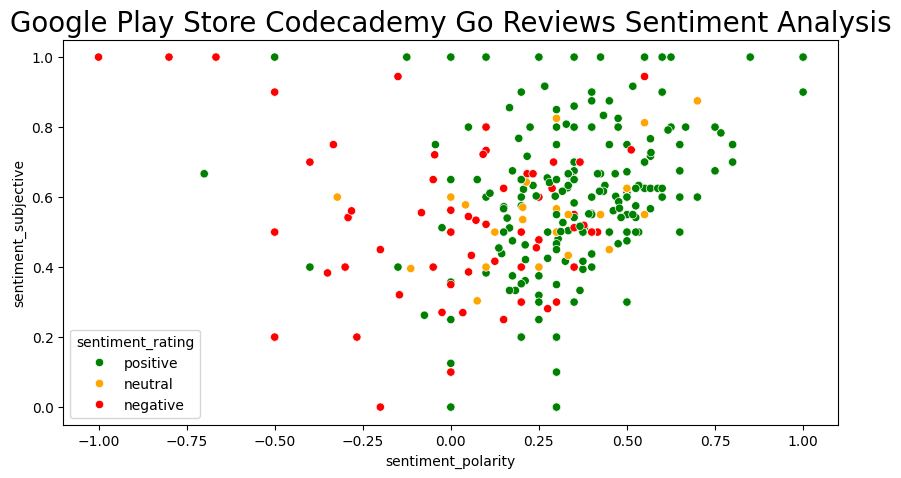

In [153]:
# Mapping warna manual untuk hue
custom_palette = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sentiment_polarity',
    y='sentiment_subjective',
    hue='sentiment_rating',
    data=df2,
    edgecolor='white',
    palette=custom_palette
)
plt.title("Google Play Store Codecademy Go Reviews Sentiment Analysis", fontsize=20)
plt.show()


In [154]:
# Hitung jumlah masing-masing kategori
rating_counts = df2['sentiment_rating'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan jumlah frekuensinya
print("📊 Jumlah Review per Kategori Berdasarkan Score:")
for sentiment, count in rating_counts.items():
    print(f"- {sentiment:<8}: {count} review")

📊 Jumlah Review per Kategori Berdasarkan Score:
- positive: 719 review
- neutral : 76 review
- negative: 151 review


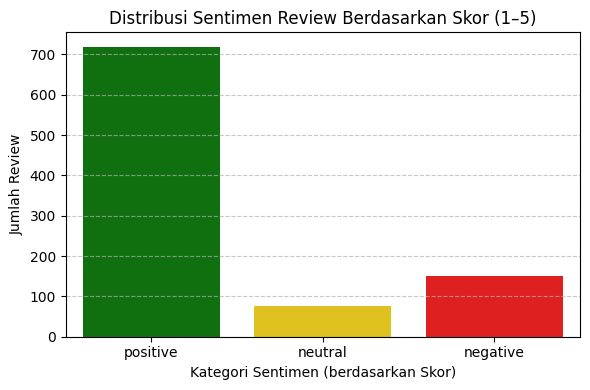

In [155]:
# Siapkan DataFrame untuk visualisasi
rating_df = rating_counts.reset_index()
rating_df.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rating_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen (berdasarkan Skor)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review Berdasarkan Skor (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

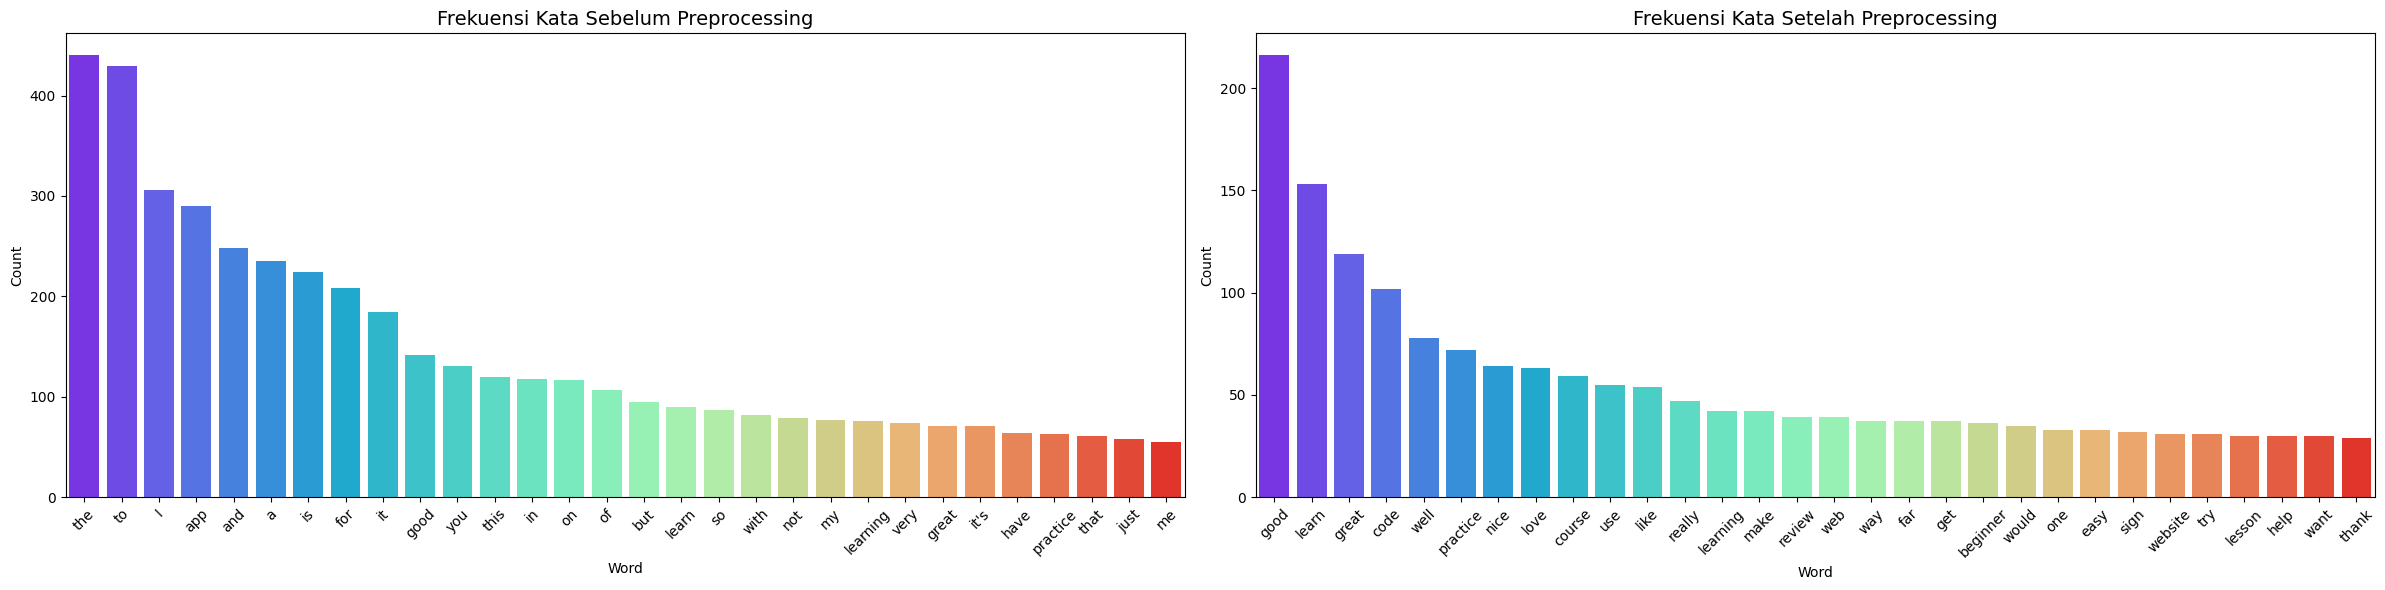

In [156]:
# Fungsi untuk visualisasi frekuensi kata
def freq_words(ax, text_series, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in text_series])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    top_words = words_df.nlargest(columns="count", n=terms)
    
    sns.barplot(data=top_words, x="word", y="count", hue="word", palette="rainbow", legend=False, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.tick_params(axis='x', rotation=45)

# Pastikan tidak ada nilai NaN
df2['content'] = df2['content'].fillna('').astype(str)

# Gabungkan token menjadi string untuk versi "after"
df2['clean_text_final'] = df2['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

# Buat 2 subplots untuk before & after
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Ganti judul tanpa emoji
freq_words(axes[0], df2['content'], title="Frekuensi Kata Sebelum Preprocessing")
freq_words(axes[1], df2['clean_text_final'], title="Frekuensi Kata Setelah Preprocessing")

plt.tight_layout()
plt.show()

### 5️⃣ **Cek Sentiment Analysis - Vader**

In [157]:
# Unduh lexicon VADER jika belum
# nltk.download('vader_lexicon')

# Inisialisasi analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [158]:
df_vader = df2[['tokens_vader_lemma']].copy()
# Gabungkan token menjadi kalimat
df_vader['text'] = df_vader['tokens_vader_lemma'].apply(lambda tokens: ' '.join(tokens))

df_vader.head(5)

,tokens_vader_lemma,text
0,"[it, be, good, apk, for, study]",it be good apk for study
1,[nice],nice
2,"[awesome, 👌]",awesome 👌
3,"[I, love, the, code, academy, ease, of, use, .]",I love the code academy ease of use .
4,"[great, way, to, keep, your, coding, skill, fr...",great way to keep your coding skill fresh in y...


In [159]:
# Fungsi untuk mengembalikan skor dari VADER
def get_vader_scores(text):
    return vader_analyzer.polarity_scores(text)

# Hitung skor dan ubah jadi kolom DataFrame
vader_scores = df_vader['text'].apply(get_vader_scores).apply(pd.Series)
df_vader = pd.concat([df_vader, vader_scores], axis=1)

In [160]:
# Kategorikan Sentimen
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['vader_sentiment'] = df_vader['compound'].apply(categorize_sentiment)

In [161]:
df_vader.head(5)

,tokens_vader_lemma,text,neg,neu,pos,compound,vader_sentiment
0,"[it, be, good, apk, for, study]",it be good apk for study,0.0,0.633,0.367,0.4404,positive
1,[nice],nice,0.0,0.000,1.000,0.4215,positive
2,"[awesome, 👌]",awesome 👌,0.0,0.000,1.000,0.6249,positive
3,"[I, love, the, code, academy, ease, of, use, .]",I love the code academy ease of use .,0.0,0.427,0.573,0.7717,positive
4,"[great, way, to, keep, your, coding, skill, fr...",great way to keep your coding skill fresh in y...,0.0,0.632,0.368,0.7506,positive


In [162]:
# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = df_vader['vader_sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan frekuensi
print("📊 Jumlah Review per Kategori Sentimen (VADER):")
for sentiment, count in sentiment_counts.items():
    print(f"- {sentiment.capitalize():<8}: {count} review")

📊 Jumlah Review per Kategori Sentimen (VADER):
- Positive: 765 review
- Neutral : 91 review
- Negative: 90 review


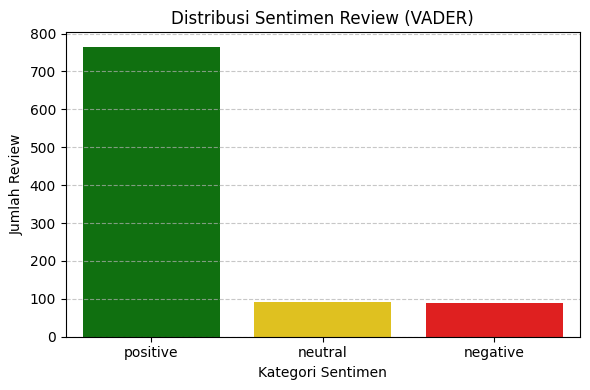

In [163]:
# Siapkan DataFrame untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Buat barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review (VADER)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [164]:
# Gabungkan kolom ke dalam satu DataFrame
df_compare = df2[['score', 'sentiment_rating']].copy()
df_compare['vader_sentiment'] = df_vader['vader_sentiment']

In [165]:
# Hitung jumlah masing-masing kombinasi kategori
compare_counts = df_compare.groupby(['sentiment_rating', 'vader_sentiment']).size().unstack(fill_value=0)
print("📊 Tabel Perbandingan Sentimen (Score vs VADER):\n")
print(compare_counts)

📊 Tabel Perbandingan Sentimen (Score vs VADER):

vader_sentiment   negative  neutral  positive
sentiment_rating                             
negative                60       42        49
neutral                 13       11        52
positive                17       38       664


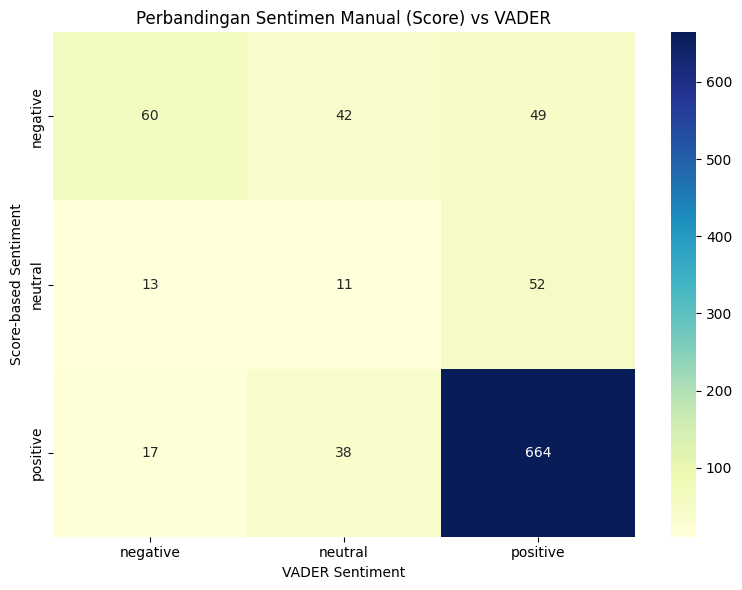

In [166]:
plt.figure(figsize=(8, 6))
sns.heatmap(compare_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Perbandingan Sentimen Manual (Score) vs VADER")
plt.xlabel("VADER Sentiment")
plt.ylabel("Score-based Sentiment")
plt.tight_layout()
plt.show()

In [167]:
# Buat kolom baru untuk mengecek apakah label cocok
df_compare['sentiment_match'] = df_compare['sentiment_rating'].str.lower() == df_compare['vader_sentiment']

total_reviews = len(df_compare)
matched = df_compare['sentiment_match'].sum()
accuracy = matched / total_reviews
print(f"✅ Total review         : {total_reviews}")
print(f"✅ Jumlah yang cocok    : {matched}")
print(f"📊 Akurasi Kesesuaian   : {accuracy:.2%}")


✅ Total review         : 946
✅ Jumlah yang cocok    : 735
📊 Akurasi Kesesuaian   : 77.70%


### 6️⃣ **Topic Modelling**

In [168]:
# Buat dataset baru untuk data model
df_modelling = df2[['tokens_clean_final']].copy()
df_modelling['clean_text_final'] = df_modelling['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [169]:
df_modelling.head(5)

,tokens_clean_final,clean_text_final
0,"[good, study]",good study
1,[nice],nice
2,[awesome],awesome
3,"[love, code, academy, use]",love code academy use
4,"[great, way, keep, code, skill, fresh, mind, c...",great way keep code skill fresh mind class


In [170]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,       # Hapus kata yang terlalu umum (muncul di >95% dokumen)
    min_df=2,          # Hapus kata yang sangat langka (muncul <2 dokumen)
    ngram_range=(1, 2)  # Termasuk bigram: meningkatkan konteks topik
)

# Transformasi ke TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(df_modelling['clean_text_final'])

In [171]:
# Tentukan jumlah topik
n_topics = 5  

# Inisialisasi dan training NMF
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X_tfidf)


,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


In [172]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"\n🧠 Topik {topic_idx+1}:")
        print(", ".join(top_features))

# Panggil fungsi
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, tfidf_feature_names)


🧠 Topik 1:
good, far good, far, learning, beginner, good learning, good learn, free, good beginner, one good

🧠 Topik 2:
great, great learning, learning, great learn, great practice, practice, thank, great way, platform, great platform

🧠 Topik 3:
nice, nice learn, nice practice, practice, review, really nice, nice one, language, keep, much

🧠 Topik 4:
love, learning, make, really, practice, far, learn love, it, love learn, academy

🧠 Topik 5:
well, learn, code, learn code, way, amazing, well learn, way learn, practice, really


In [173]:
# Mapping topik ke label tematik (edit sesuai kebutuhan dan interpretasi manual)
topic_labels = {
    0: "Topik 1 - Pengalaman Awal yang Baik bagi Pemula",
    1: "Topik 2 - Apresiasi terhadap Metode & Platform Belajar",
    2: "Topik 3 - Review Singkat yang Positif dan Ringan",
    3: "Topik 4 - Kecintaan dan Loyalitas terhadap CodeCademy",
    4: "Topik 5 - Cara Belajar Koding yang Efektif & Menarik"
}

def display_labeled_topics(model, feature_names, topic_labels, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        label = topic_labels.get(topic_idx, f"Topik {topic_idx+1}")  # fallback jika label tidak tersedia
        print(f"\n🧠 {label}")
        print("🔑 Kata Kunci:", ", ".join(top_features))

# Panggil fungsi
display_labeled_topics(nmf_model, tfidf_feature_names, topic_labels)


🧠 Topik 1 - Pengalaman Awal yang Baik bagi Pemula
🔑 Kata Kunci: good, far good, far, learning, beginner, good learning, good learn, free, good beginner, one good

🧠 Topik 2 - Apresiasi terhadap Metode & Platform Belajar
🔑 Kata Kunci: great, great learning, learning, great learn, great practice, practice, thank, great way, platform, great platform

🧠 Topik 3 - Review Singkat yang Positif dan Ringan
🔑 Kata Kunci: nice, nice learn, nice practice, practice, review, really nice, nice one, language, keep, much

🧠 Topik 4 - Kecintaan dan Loyalitas terhadap CodeCademy
🔑 Kata Kunci: love, learning, make, really, practice, far, learn love, it, love learn, academy

🧠 Topik 5 - Cara Belajar Koding yang Efektif & Menarik
🔑 Kata Kunci: well, learn, code, learn code, way, amazing, well learn, way learn, practice, really


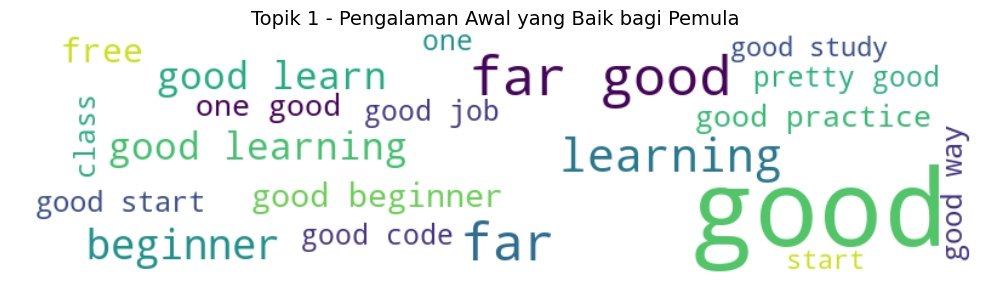

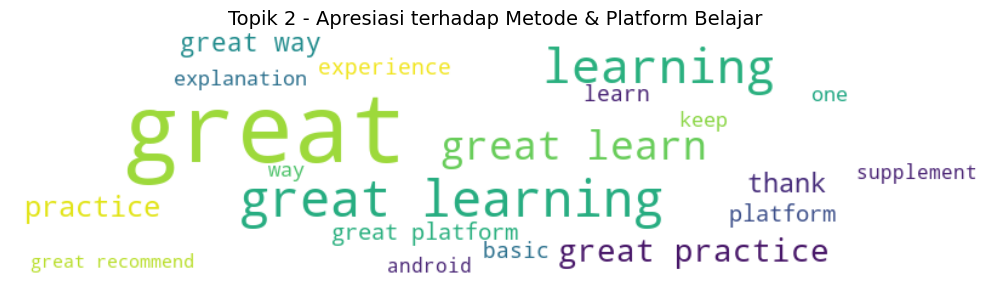

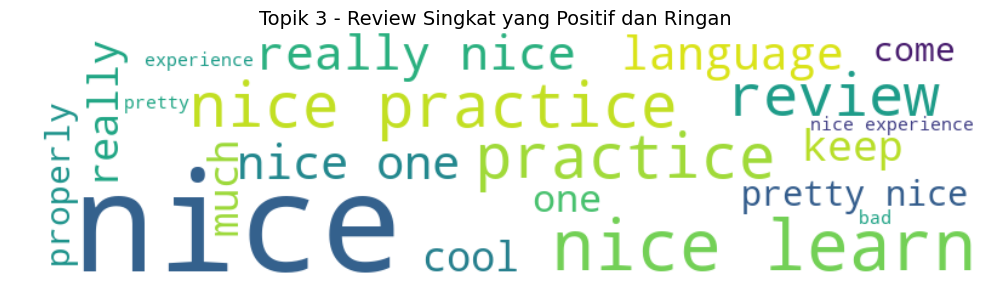

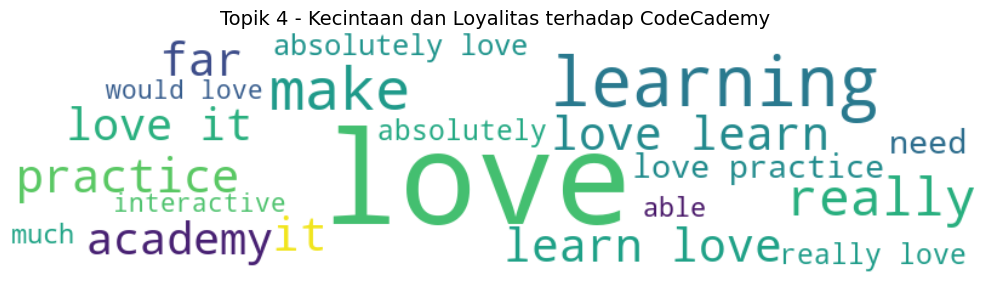

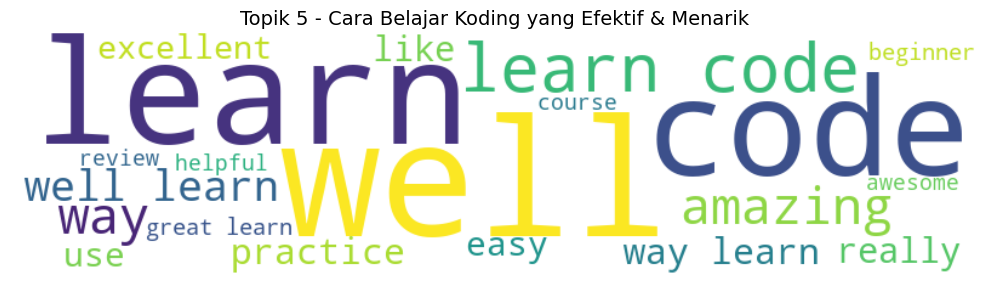

In [174]:
def plot_wordclouds_with_labels(model, feature_names, topic_labels, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        top_features = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=200, background_color='white').generate_from_frequencies(top_features)

        label = topic_labels.get(topic_idx, f"Topik {topic_idx + 1}")
        
        plt.figure(figsize=(10, 3))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{label}", fontsize=14)
        plt.tight_layout()
        plt.show()


# Jalankan visualisasi WordCloud
plot_wordclouds_with_labels(nmf_model, tfidf_feature_names, topic_labels)

In [175]:
# Dapatkan distribusi topik tiap dokumen
topic_distribution = nmf_model.transform(X_tfidf)

# Ambil topik dominan untuk setiap review
df_modelling['dominant_topic'] = topic_distribution.argmax(axis=1)

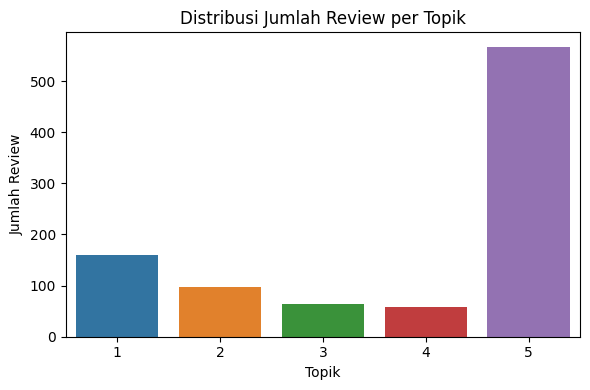

In [176]:
# Buat salinan kolom untuk ditampilkan sebagai 1-based indexing
df_modelling['dominant_topic_display'] = df_modelling['dominant_topic'] + 1

# Visualisasi distribusi topik dengan label mulai dari 1
plt.figure(figsize=(6, 4))
sns.countplot(
    x='dominant_topic_display',
    data=df_modelling,
    hue='dominant_topic_display',
    palette='tab10',
    legend=False
)
plt.title("Distribusi Jumlah Review per Topik")
plt.xlabel("Topik")
plt.ylabel("Jumlah Review")
plt.tight_layout()
plt.show()


In [177]:
df_modelling['jenis_topik'] = df_modelling['dominant_topic'].map(topic_labels) 
df_modelling.head(5)

,tokens_clean_final,clean_text_final,dominant_topic,dominant_topic_display,jenis_topik
0,"[good, study]",good study,0,1,Topik 1 - Pengalaman Awal yang Baik bagi Pemula
1,[nice],nice,2,3,Topik 3 - Review Singkat yang Positif dan Ringan
2,[awesome],awesome,4,5,Topik 5 - Cara Belajar Koding yang Efektif & M...
3,"[love, code, academy, use]",love code academy use,3,4,Topik 4 - Kecintaan dan Loyalitas terhadap Cod...
4,"[great, way, keep, code, skill, fresh, mind, c...",great way keep code skill fresh mind class,1,2,Topik 2 - Apresiasi terhadap Metode & Platform...


### 7️⃣ **Clustering**

In [178]:
# Buat dataset baru untuk data model
df_clustering = df2[['tokens_clean_final']].copy()
df_clustering['clean_text_final'] = df_clustering['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [179]:
df_clustering.head(5)

,tokens_clean_final,clean_text_final
0,"[good, study]",good study
1,[nice],nice
2,[awesome],awesome
3,"[love, code, academy, use]",love code academy use
4,"[great, way, keep, code, skill, fresh, mind, c...",great way keep code skill fresh mind class


In [180]:
# Vectorizer untuk clustering (gunakan unigram dulu agar stabil)
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english',
    ngram_range=(1, 1)
)

X_tfidf = tfidf_vectorizer.fit_transform(df_clustering['clean_text_final'])

In [181]:
# Tentukan jumlah cluster (misalnya 5, bisa diuji nanti)
n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(X_tfidf)

# Simpan label cluster ke DataFrame
df_clustering['cluster'] = kmeans_model.labels_

In [182]:
# Ambil nama fitur dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
def show_top_keywords_per_cluster(kmeans_model, feature_names, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil index fitur tertinggi
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        print(f"\n🔷 Cluster {cluster_num}:")
        print("   " + ", ".join(top_keywords))

# Panggil fungsi
show_top_keywords_per_cluster(kmeans_model, feature_names)


🔷 Cluster 0:
   good, nice, love, far, practice, amazing, learning, excellent, cool, course

🔷 Cluster 1:
   great, learning, learn, practice, platform, way, love, far, concept, experience

🔷 Cluster 2:
   code, learn, good, academy, practice, way, beginner, great, nice, platform

🔷 Cluster 3:
   learn, really, use, easy, way, love, good, great, like, programming

🔷 Cluster 4:
   make, perfect, love, code, web, impossible, learn, experience, learning, easy


In [183]:
# Mapping label deskriptif untuk tiap cluster
cluster_labels = {
    0: "Cluster 1 - Antusiasme & Kepuasan Pengguna yang Tinggi",
    1: "Cluster 2 - Kualitas Pembelajaran & Platform yang Dihargai",
    2: "Cluster 3 - Pembelajaran Koding yang Mudah & Terstruktur",
    3: "Cluster 4 - Pengalaman Awal dan Proses Memahami Dasar",
    4: "Cluster 5 - Fitur Interaktif & Praktik Belajar Mandiri"
}

def show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil top-n kata per cluster
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        # Ambil label deskriptif dari mapping
        label = cluster_labels.get(cluster_num, f"Cluster {cluster_num}")
        
        print(f"\n🔷 {label}:")
        print("   " + ", ".join(top_keywords))

show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels)


🔷 Cluster 1 - Antusiasme & Kepuasan Pengguna yang Tinggi:
   good, nice, love, far, practice, amazing, learning, excellent, cool, course

🔷 Cluster 2 - Kualitas Pembelajaran & Platform yang Dihargai:
   great, learning, learn, practice, platform, way, love, far, concept, experience

🔷 Cluster 3 - Pembelajaran Koding yang Mudah & Terstruktur:
   code, learn, good, academy, practice, way, beginner, great, nice, platform

🔷 Cluster 4 - Pengalaman Awal dan Proses Memahami Dasar:
   learn, really, use, easy, way, love, good, great, like, programming

🔷 Cluster 5 - Fitur Interaktif & Praktik Belajar Mandiri:
   make, perfect, love, code, web, impossible, learn, experience, learning, easy


In [184]:
# Reduksi dimensi
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne_model.fit_transform(X_tfidf.toarray())

# Simpan hasil TSNE ke DataFrame
df_clustering['tsne_x'] = tsne_results[:, 0]
df_clustering['tsne_y'] = tsne_results[:, 1]

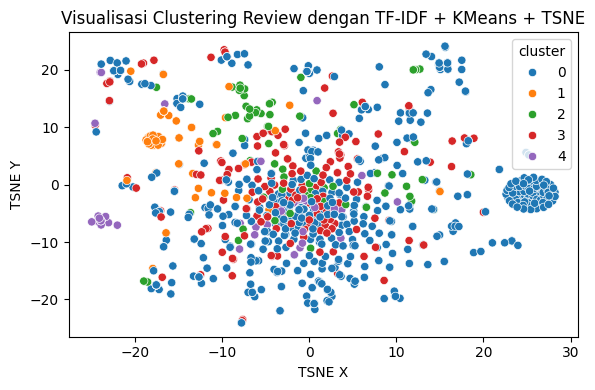

In [185]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='tsne_x', y='tsne_y',
    hue='cluster',
    data=df_clustering,
    palette='tab10',
    legend='full'
)

plt.title("Visualisasi Clustering Review dengan TF-IDF + KMeans + TSNE")
plt.xlabel("TSNE X")
plt.ylabel("TSNE Y")
plt.tight_layout()
plt.show()

In [186]:
# Buat kolom baru berdasarkan mapping
df_clustering['cluster_label'] = df_clustering['cluster'].map(cluster_labels)
df_clustering.head(5)

,tokens_clean_final,clean_text_final,cluster,tsne_x,tsne_y,cluster_label
0,"[good, study]",good study,0,18.154108,-1.764554,Cluster 1 - Antusiasme & Kepuasan Pengguna yan...
1,[nice],nice,0,15.914249,20.084608,Cluster 1 - Antusiasme & Kepuasan Pengguna yan...
2,[awesome],awesome,0,-9.445334,22.239031,Cluster 1 - Antusiasme & Kepuasan Pengguna yan...
3,"[love, code, academy, use]",love code academy use,2,-8.847741,16.963192,Cluster 3 - Pembelajaran Koding yang Mudah & T...
4,"[great, way, keep, code, skill, fresh, mind, c...",great way keep code skill fresh mind class,2,1.708739,-0.550211,Cluster 3 - Pembelajaran Koding yang Mudah & T...


### 8️⃣ **Penggabungan Data Hasil Review**

In [187]:
# Pastikan indexnya sejajar dan urutan review konsisten
df_final = pd.concat([
    df2[['content', 'score', 'sentiment_rating']].reset_index(drop=True),
    df_vader[['vader_sentiment']].reset_index(drop=True),
    df_modelling[['jenis_topik']].reset_index(drop=True),
    df_clustering[['cluster_label']].reset_index(drop=True)
], axis=1)

In [188]:
df_final.head(5)

,content,score,sentiment_rating,vader_sentiment,jenis_topik,cluster_label
0,it is good apk for studying,5,positive,positive,Topik 1 - Pengalaman Awal yang Baik bagi Pemula,Cluster 1 - Antusiasme & Kepuasan Pengguna yan...
1,nice,4,positive,positive,Topik 3 - Review Singkat yang Positif dan Ringan,Cluster 1 - Antusiasme & Kepuasan Pengguna yan...
2,Awesome 👌,5,positive,positive,Topik 5 - Cara Belajar Koding yang Efektif & M...,Cluster 1 - Antusiasme & Kepuasan Pengguna yan...
3,I love the Code Academy ease of use.,4,positive,positive,Topik 4 - Kecintaan dan Loyalitas terhadap Cod...,Cluster 3 - Pembelajaran Koding yang Mudah & T...
4,Great way to keep your coding skills fresh in ...,5,positive,positive,Topik 2 - Apresiasi terhadap Metode & Platform...,Cluster 3 - Pembelajaran Koding yang Mudah & T...


In [189]:
output_path = "../data/review_final_codecademygo.xlsx"
df_final.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_final_codecademygo.xlsx
